In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('C:/Users/hp/Desktop/mn/avocado-prices/avocado.csv')

In [5]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
df.shape

(18249, 14)

In [9]:
df.isnull().sum()
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [38]:
df = df.drop(["Unnamed: 0","Date"],axis = 1 )
df.info()

KeyError: "['Unnamed: 0' 'Date'] not found in axis"

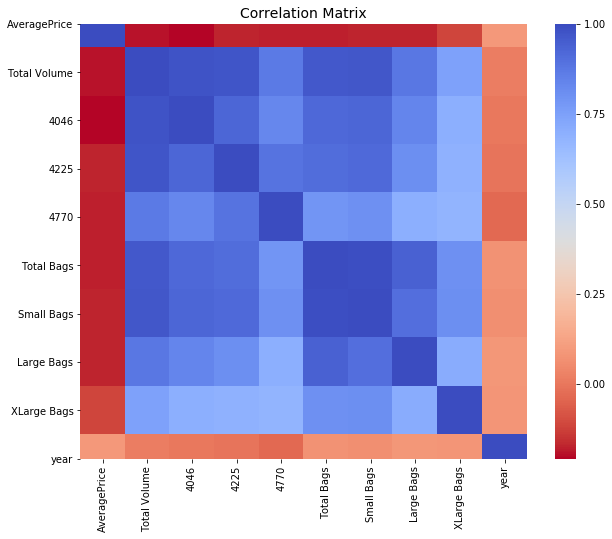

In [39]:
f, ax = plt.subplots(1, 1, figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax)
ax.set_title("Correlation Matrix", fontsize=14)
plt.show()

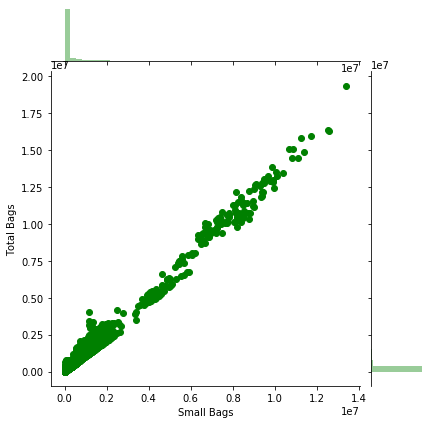

In [40]:
sns.jointplot(x='Small Bags',y='Total Bags',data=df, color='green')

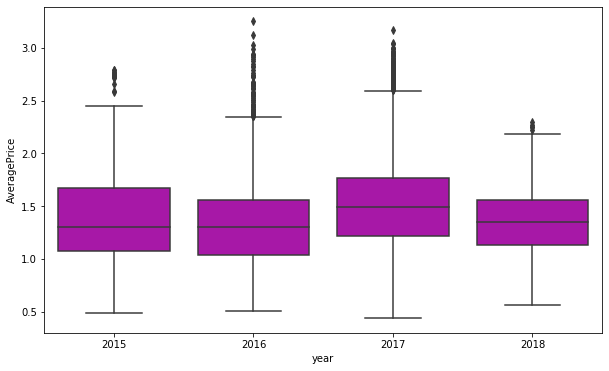

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
sns.boxplot(x='year',y='AveragePrice',data=df,color='m')

(0.44, 3.25)

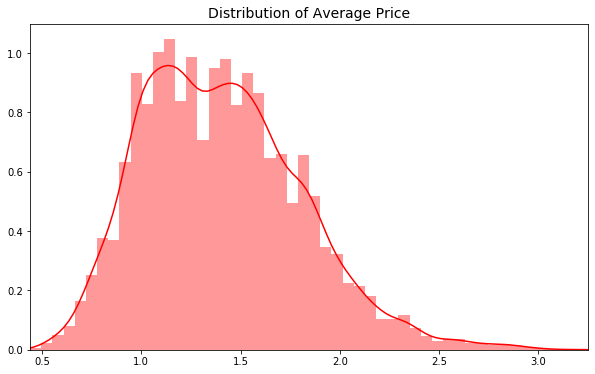

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
price_val = df['AveragePrice'].values
sns.distplot(price_val, color='r')
ax.set_title('Distribution of Average Price', fontsize=14)
ax.set_xlim([min(price_val), max(price_val)])

In [43]:
X = df.drop(['AveragePrice'], axis = 1).values
y = df['AveragePrice'].values

In [44]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 8] = labelencoder_X_1.fit_transform(X[:, 9])
labelencoder_X_2 = LabelEncoder()
X[:, 9] = labelencoder_X_2.fit_transform(X[:, 10])
labelencoder_X_3 = LabelEncoder()
X[:, 10] = labelencoder_X_3.fit_transform(X[:, 10])

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop(['AveragePrice', 'type', 'year', 'region'],axis=1))
scaled_features = scaler.transform(df.drop(['AveragePrice', 'type', 'year', 'region'],axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[1:9])
df_feat.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.227716,-0.230816,-0.199902,-0.212091,-0.234170,-0.232647,-0.222352,-0.17558
1,-0.230427,-0.231103,-0.208054,-0.211997,-0.233350,-0.231568,-0.222335,-0.17558
2,-0.212085,-0.231007,-0.154478,-0.211325,-0.234730,-0.233399,-0.222311,-0.17558
3,-0.223444,-0.230741,-0.185350,-0.211864,-0.237096,-0.236568,-0.222186,-0.17558
4,-0.231538,-0.230891,-0.208719,-0.211834,-0.236718,-0.236154,-0.221924,-0.17558


In [48]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
y_test = lab_enc.fit_transform(y_test)

In [50]:
from sklearn.multiclass import OneVsRestClassifier

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg = OneVsRestClassifier(logreg, n_jobs=1)
logreg.fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)


from sklearn.svm import SVC
svc = SVC()
svc = OneVsRestClassifier(svc, n_jobs=1)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree = OneVsRestClassifier(decision_tree, n_jobs=1)
decision_tree.fit(X_train, y_train)
pred_tree = decision_tree.predict(X_test)

C:\Users\hp\.jupyter\New folder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\.jupyter\New folder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\.jupyter\New folder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\.jupyter\New folder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\.jupyter\New folder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

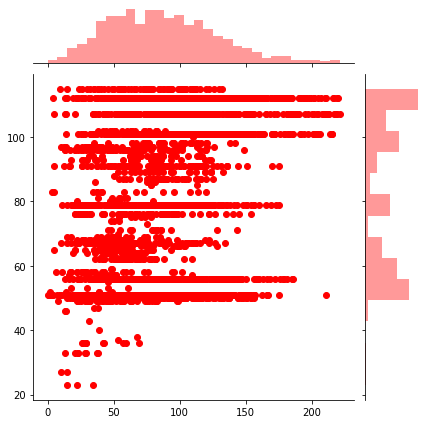

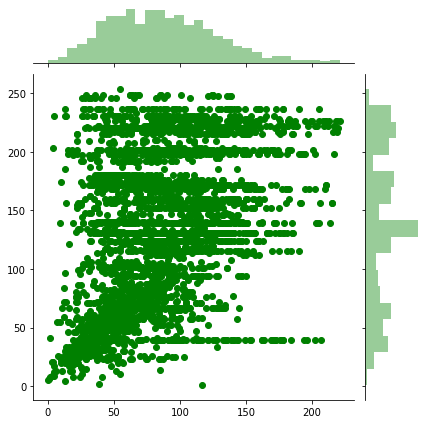

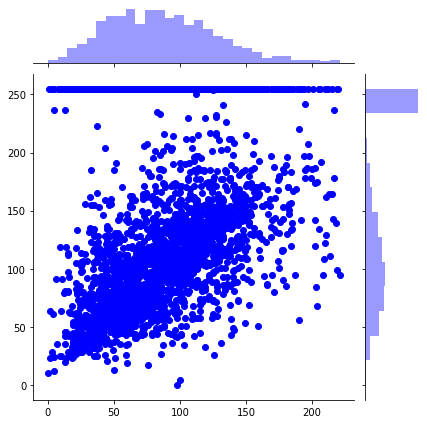

In [52]:
sns.jointplot(x=y_test, y=pred_logreg, color= 'r')
sns.jointplot(x=y_test, y=pred_svc, color= 'g')
sns.jointplot(x=y_test, y=pred_tree, color= 'b')

In [53]:
print(X_train.shape[1])
print(X_train.shape[0])
print(len(np.unique(y_train)))
print((len(np.unique(y_train)) + X_train.shape[0]) /2)

11
14599
256
7427.5


In [54]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils
from numpy import argmax
BATCH_SIZE = 1000
EPOCHS = 30
VALIDATION_SPLIT = 0.1
file_path="weights_base3.best.hdf5"
checkpoint = ModelCheckpoint(file_path, monitor='val_loss', save_best_only=True, mode='min')
early = EarlyStopping(monitor="val_acc", mode="max", patience=5)
callbacks_list = [checkpoint, early]

def get_model():
    model = Sequential()
    model.add(Dense(7428, input_dim=X_train.shape[1]))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7428))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='softmax'))
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                 metrics=['accuracy']
                 )
    model.summary()
    return model
model_nn = get_model()
model_nn.fit(X_train, np_utils.to_categorical(y_train),
                  batch_size=BATCH_SIZE, 
                  epochs=EPOCHS,
                  callbacks=callbacks_list,
                  validation_split=VALIDATION_SPLIT
             )
model_nn.load_weights(file_path)
pred_ann = argmax(model_nn.predict(X_test), axis = 1)

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 7428)              89136     
_________________________________________________________________
activation_1 (Activation)    (None, 7428)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7428)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 7428)              55182612  
_________________________________________________________________
activation_2 (Activation)    (None, 7428)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7428)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)              

C:\Users\hp\.jupyter\New folder\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/30
13139/13139 [==============================] - 77s 6ms/step - loss: 4.9836 - accuracy: 0.0140 - val_loss: 4.9497 - val_accuracy: 0.0130
Epoch 3/30
13139/13139 [==============================] - 83s 6ms/step - loss: 4.8672 - accuracy: 0.0201 - val_loss: 4.8514 - val_accuracy: 0.0110
Epoch 4/30
13139/13139 [==============================] - 75s 6ms/step - loss: 4.7748 - accuracy: 0.0188 - val_loss: 4.8050 - val_accuracy: 0.0151
Epoch 5/30
13139/13139 [==============================] - 78s 6ms/step - loss: 4.7170 - accuracy: 0.0218 - val_loss: 4.7646 - val_accuracy: 0.0212
Epoch 6/30
13139/13139 [==============================] - 75s 6ms/step - loss: 4.6743 - accuracy: 0.0221 - val_loss: 4.7405 - val_accuracy: 0.0199
Epoch 7/30
13139/13139 [==============================] - 76s 6ms/step - loss: 4.6453 - accuracy: 0.0234 - val_loss: 4.7355 - val_accuracy: 0.0123
Epoch 8/30
13139/13139 [==============================] - 79s 6ms/step - loss: 4.6133 - accuracy: 0.0267 - val_loss: 4

[]

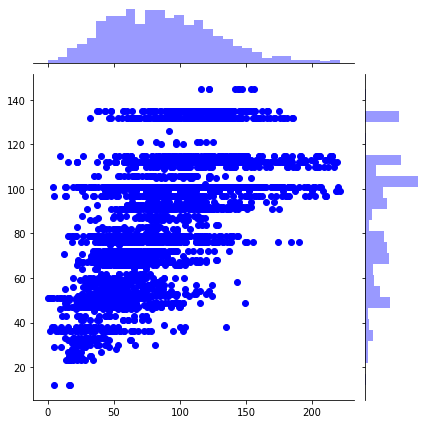

In [56]:
sns.jointplot(x=y_test, y=pred_ann, color= 'b')
plt.plot()